# 4. 데이터 표현과 특성 공학
# Representing Data and Engineering Features

특정 애플리케이션에 가장 적합한 데이터 표현을 찾는 것을 **특성공학**(feature engineering) 이라 함

## 4.1 범주형 변수 - Categorical Variables

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from IPython.display import display

* 예제에서 사용할 데이터는 1994년 인구 조사 데이터베이스에서 추출한 미국 성인의 소득 데이터 셋임
* [얼바인 머신러닝 저장소](https://archive.ics.uci.edu/ml/datasets/Adult)에서 다운로드 받을 수 있음
* Adult 데이터 셋에는
    * age: 나이
    * workclass: 고용형태, self-emp-not-inc(자영업), private(사업체 근로자), state-gov(공공 근로자)
    * education: 교육수준
    * gender(sex): 성별
    * hours-per-week: 주당 근로시간
    * occupation: 직업 등의 특성이 있음

* `workclass, education, sex, occupation`은 범주형 특성임 $\rightarrow$ 정성적인 속성
* 이러한 특성(feature)들을 사용하여 로지스틱 회귀(Logistic regression) 등과 같은 분류를 하려면 범주형 특성을 다른 방식으로 표현해야 함

### 4.1.1 원-핫-인코딩 (One-Hot-Encoding) : 가변수, Dummy Variables
* **One-Hot-Encoding**은 범주형 변수를 [0, 1]로 표현하는 방법으로 가변수(Dummy variables)라고함 

In [2]:
# 이 파일은 열 이름을 나타내는 헤더가 없으므로 header = None으로 지정하고
# 'names' 파라미터로 열 이름을 적어줌
data = pd.read_csv('./data/adult.data', header=None, index_col=False, 
                  names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
                         'marital-status', 'occupation', 'relationship', 'race', 'gender',
                         'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                         'income'])
# 예제에서 사용할 컬럼을 선택
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
# Ipython.display 함수는 jupyter notebook에서 포맷팅된 출력을 제공
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


### 범주형 데이터 확인하기
* 먼저 열에 어떤 의미있는 범주형 데이터가 있는지 확인해보는 것이 좋음
* 오타, 특이값 등의 문제로 전처리를 해줘야하는 경우가 있음
* `pandas`의 `Series`에 있는 `value_counts()`를 이용하여 확인할 수 있음

In [3]:
# gender 컬럼의 unique한 값 개수 확인하기
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


* `pandas.get_dummies()`를 이용해 객체타입(문자열 같은)이나 범주형을 가진 컬럼을 자동으로 **one-hot-encoding** 을 해줌

In [4]:
print("원본 특성: \n", list(data.columns), '\n')
data_dummies = pd.get_dummies(data)
print("get_dummies 후의 특성:\n", list(data_dummies.columns))

원본 특성: 
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_

In [5]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


* `pandas.DataFrame.values`를 이용해 DataFrame을 `numpy` 배열로 변환할 수 있음

In [6]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Numpy 배열 추출
X = features.values
y = data_dummies['income_ >50K'].values
print('X.shape: {} y.shape: {}'.format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


* `sklearn.linear_model.`[LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) 적용하기

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
print("테스트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 점수: 0.81


### 4.1.2 숫자로 표현된 범주형 특성 (Numbers can encode categoricals)

In [10]:
# 숫자 특성과 범주형 문자열 특성을 가진 DataFrame을 만듦
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
                        'Categorical Feature': ['socks', 'fox', 'socks', 'box'] })
demo_df

,Categorical Feature,Integer Feature
0,socks,0
1,fox,1
2,socks,2
3,box,1


* 아래의 출력 결과에서 처럼 `pandas`의 `get_dummies()`함수는 *숫자 특성* 은 **연속형 변수**로 생각해 가변수(dummy variable)를 만들지 않음 

In [11]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


* **숫자 특성** 또한 가변수로 만들고 싶은 경우, 컬럼의 **데이터 타입**을 문자열(str)로 바꿔주면 됨
* 또는, `get_dummies()`함수에서 `columns` 파라미터에 가변수를 만들 컬럼을 지정해 주면 됨

In [12]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
# pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])
pd.get_dummies(demo_df)

,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks,Integer Feature_0,Integer Feature_1,Integer Feature_2
0,0,0,1,1,0,0
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,1,0,0,0,1,0


## 4.2 구간 분할, 이산화 그리고 선형모델, 트리모델 - Binning, Discretization, Linear Models and Trees
* 데이터를 가장 잘 표현하는 방법은 데이터가 가진 의미뿐 아니라 어떤 모델을 사용하는지에 따라 다름
* 예를들어, 선형모델(Linear model)과 트리모델(Tree model)은 특성(feature)의 표현 방식으로 인해 미치는 영향이 매우 다름
* 이를 확인하기 위해, 예제 데이터인 wave 데이터 셋을 이용
* wave 데이터 셋으로 모델을 만들고 `np.linspace`로 1000개의 $x$축 포인트를 담은 Numpy 배열 line을 만들어 모델의 예측값을 시각화 함

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [14]:
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

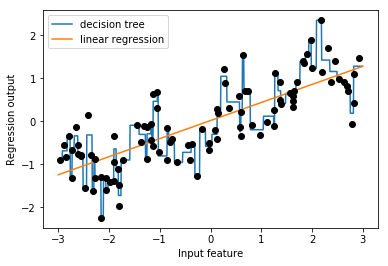

In [15]:
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label='decision tree')

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label='linear regression')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel('Input feature')
plt.legend(loc='best')

* 위의 그래프에서 볼 수 있듯이, 선형모델(linear model)은 선형관계로만 모델링 하므로 특성이 하나일 때는 직선으로 나타남
* wave 데이터 셋과 같이 연속형 데이터에 잘맞는(?) 선형 모델을 만드는 방법 중 하나는 한 특성을 여러 특성으로 나누는 방법이 있음
* 이를 **구간분할(Binning)** 또는 이산화라고 함

### 구간분할(Binning) 예시
* wave 데이터셋의 범위 [-3, 3]에서 10개의 구간으로 나누는 예제를 통해 구간 분할에 대해 알아보자
* 아래의 출력결과에서
    * 첫번째 구간: [-3, -2.4)
    * 두번째 구간: [-2.4, -1.8) ...과 같이 구간을 분할

In [16]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


* `np.digitize()`를 이용해 각 데이터가 어느 구간에 속하는지 확인할 수 있음

In [17]:
which_bin = np.digitize(X, bins=bins)
print("\n Data points: \n", X[:5])
print("\n 데이터 포인트의 소속 구간: \n", which_bin[:5])


 Data points: 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

 데이터 포인트의 소속 구간: 
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [18]:
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html 참고
# 데이터를 구간화(Binning)했으므로, 범주형(Categorical) 변수이기 때문에 
# One-Hot Encoding을 해줌
from sklearn.preprocessing import OneHotEncoder

In [19]:
# 변환을 위해 OneHotEncoder를 사용
encoder = OneHotEncoder(sparse=False)
# encoder.fit()은 which_bin에 나타난 유일한 값을 찾음
encoder.fit(which_bin)
# One-hot encoding으로 변환
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [20]:
# 구간을 10개로 정의했으므로, shape는 (100, 10)
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


Text(0.5,1,'Linear Binning')

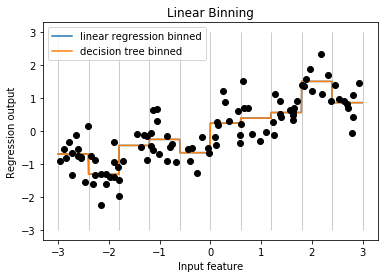

In [21]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.title('Linear Binning')

## 4.3 상호작용과 다항식 - Interactions and Polynomials
* 위의 **4.2** 에서 **Binning**을 이용해 wave 데이터 셋에 대한 선형모델은 각 **구간(Bins)**에 대해 **상수값** 즉, 절편을 학습했음
* 구간으로 분할된 데이터에 원래의 특성(feature)을 다시 추가하는 방법을 통해 **선형모델**에 **기울기**를 학습할 수 있음 
* `np.hstack()`을 이용해 원래의 데이터에 `X_binned` 데이터를 추가해줌
* `np.hstack`: Stack arrays in sequence horizontally (column wise).
```
>>> a = np.array([[1],[2],[3]])
>>> b = np.array([[2],[3],[4]])
>>> np.hstack((a,b))
array([[1, 2],
         [2, 3],
         [3, 4]])
```

### 상호작용 - Interaction

In [24]:
# X_combined = np.hstack([X, X_binned])
X_combined = np.column_stack([X, X_binned])
print(X_combined.shape)

tmp_df = pd.DataFrame(X_combined)
tmp_df.head()

(100, 11)


,0,1,2,3,4,5,6,7,8,9,10
0,-0.752759,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.704286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.391964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.591951,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-2.063888,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


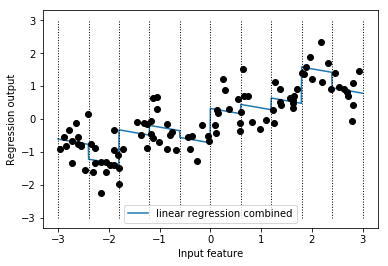

In [25]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)

plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

* 위의 그래프에서 볼 수 있듯이, 학습된 기울기는 음수이며 모든 구간(bins)에 걸쳐 동일함
* 즉, 특성(feature)이 하나이므로 기울기 또한 하나임 $\rightarrow$ 각 구간(bins)마다 다른 기울기를 가지는 것이 더 좋음
* 각 구간 마다 다른 기울기를 구하기 위해 Binning한 구간(bins)과 원래의 데이터인 wave 데이터 셋의 X축 간의 상호작용(interaction)을 추가해줌 $\rightarrow$ bin-indicator 와 original-factor의 곱 

In [26]:
# X_binned는 데이터 포인트가 속한 구간의 one-hot-encoding이므로 
# X를 곱하게 되면 해당 구간 외에는 모두 0이 됨
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)
tmp_df = pd.DataFrame(X_product)
tmp_df.head()

(100, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.000000,-0.0,-0.752759,-0.0,-0.000000,-0.0,-0.000000,-0.0,-0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,2.704286
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.391964,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.591951,0.0,0.000000,0.0,0.000000
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-2.063888,-0.0,-0.000000,-0.0,-0.000000,-0.0,-0.000000,-0.0,-0.000000


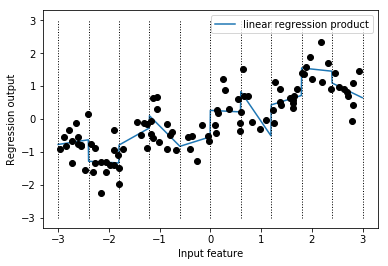

In [27]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

### 다항식 - Polynomial

* Original Feature에 다항식을 추가하는 방법이 있음
* $ X^2, X^3, X^4 ... $ 등 적용해 볼 수 있음

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
X[:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [30]:
# x**10 까지 고차항을 추가
# include_bias=True 이면 절편에 해당하는 1인 상수를 추가함
poly = PolynomialFeatures(degree=10, include_bias=False).fit(X)
X_poly = poly.transform(X)

In [31]:
print("X_poly.shape: {}".format(X_poly.shape))
tmp_df = pd.DataFrame(X_poly, columns=['$X$', '$X^2$', '$X^3$', '$X^4$', '$X^5$',
                                       '$X^6$', '$X^7$', '$X^8$', '$X^9$', '$X^{10}$'])
tmp_df.head()

X_poly.shape: (100, 10)


,$X$,$X^2$,$X^3$,$X^4$,$X^5$,$X^6$,$X^7$,$X^8$,$X^9$,$X^{10}$
0,-0.752759,0.566647,-0.426548,0.321088,-0.241702,0.181944,-0.136960,0.103098,-0.077608,0.058420
1,2.704286,7.313162,19.776880,53.482337,144.631526,391.124988,1057.713767,2860.360362,7735.232021,20918.278410
2,1.391964,1.937563,2.697017,3.754150,5.225640,7.273901,10.125005,14.093639,19.617834,27.307312
3,0.591951,0.350406,0.207423,0.122784,0.072682,0.043024,0.025468,0.015076,0.008924,0.005283
4,-2.063888,4.259634,-8.791409,18.144485,-37.448187,77.288869,-159.515582,329.222321,-679.478050,1402.366700


In [32]:
# get_feature_names() 를 이용해 특성의 차수를 알 수 있음
print("Polynomial feature names: \n{}".format(poly.get_feature_names()))

Polynomial feature names: 
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


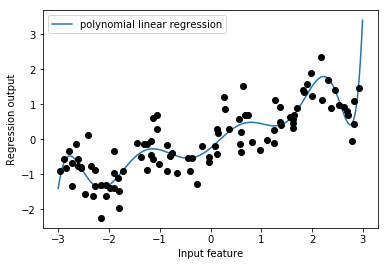

In [33]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

### *Polynomial linear regression* VS *Kernel SVM*
* **Polynomial**은 위의 그래프의 좌, 우측에서 데이터가 부족한 영역에서는 민감하게 반응함
* **Kernel SVM**을 이용해 Original Data를 학습시켜 봄
* Support Vector Regression([SVR](http://www.saedsayad.com/support_vector_machine_reg.htm)) 참고
* `sklearn.svm`.[SVR](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) 을 이용

In [34]:
from sklearn.svm import SVR

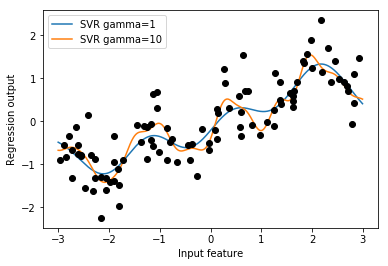

In [35]:
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

### Boston 주택 가격 데이터셋을 이용

* **데이터 설명**: 보스턴 시의 주택 가격에 대한 데이터
    * 주택의 여러가진 요건들과 주택의 가격 정보가 포함
    * 주택의 가격에 영향을 미치는 요소를 분석하고자 하는 목적으로 사용
    * 회귀분석 등의 분석에 활용

* **데이터 특성(feature)**:

| Feature | 설명
|---|---
| [01]  CRIM      |자치시(town) 별 1인당 범죄율 
| [02]  ZN      | 25,000 평방피트를 초과하는 거주지역의 비율     
| [03]  INDUS | 비소매상업지역이 점유하고 있는 토지의 비율    
|[04]  CHAS|찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
|[05]  NOX|10ppm 당 농축 일산화질소
|[06]  RM|주택 1가구당 평균 방의 개수
|[07]  AGE|1940년 이전에 건축된 소유주택의 비율
|[08]  DIS|5개의 보스턴 직업센터까지의 접근성 지수
|[09]  RAD|방사형 도로까지의 접근성 지수
|[10]  TAX|10,000 달러 당 재산세율
|[11]  PTRATIO|자치시(town)별 학생/교사 비율
|[12]  B|1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함
|[13]  LSTAT|모집단의 하위계층의 비율(%)
|[14]  MEDV=target|본인 소유의 주택가격(중앙값) (단위: $1,000)

In [36]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [37]:
boston = load_boston()

# boston_df = pd.DataFrame(boston)
# boston_df.head()

boston_df = pd.DataFrame(np.column_stack((boston.data, boston.target)), columns=list(boston.feature_names)+['target'])
print(boston_df.shape)
boston_df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [38]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [39]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# 데이터 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
# 2차 다항식을 적용 include_bias=True 가 default
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


* 아래의 코드에서 처럼, `sklearn.preprocessing.PolynomialFeatures()`를 이용해 13개의 feature에서 105개의 interaction feature로 확장된 것을 확인할 수 있음
* `PolynomialFeatures()`에서 `degree=2`로 설정하면 original feature의 제곱과 13개 중 2개를 선택한 특성의 곱을 얻을 수 있음
* $ 105 = 1(bias) + 13(original) + 13(제곱) + _{ 13 }^{  }{ { C }_{ 2 } }(두 개 조합) $

In [41]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


### Ridge Regression을 이용한 *Original feature* VS *Interaction features*
* sklearn.linear_model.[Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) 를 이용해 구현
* Linear least squares with **l2 regularization**.
* $$ \begin{equation*} \sum_{i=1}^n (y_i - \sum_{j=1}^p x_{ij}\beta_j)^2 + \lambda \sum_{j=1}^p \beta_j^2 \end{equation*} $$

In [42]:
from sklearn.linear_model import Ridge

In [43]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [44]:
print("Score without interactions: {:.3f}".format(
    ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(
    ridge.score(X_test_poly, y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


### Random Forest을 이용한 *Original feature* VS *Interaction features*
* sklearn.ensemble.[RandomForestRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)을 이용

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
    rf.score(X_test_scaled, y_test)))

Score without interactions: 0.795


* `RandomForestRegressor()`의 파라미터 `max_features='auto'`의 영향으로 트리 모델을 생성할 때 각 트리에서 사용될 후보 특성(feature)의 개수를 제한하기 때문에 결과에 영향을 받을 수 가 있음

In [47]:
rf = RandomForestRegressor(n_estimators=100, random_state=0)
# rf = RandomForestRegressor(n_estimators=100, random_state=0, max_features=None)
rf.fit(X_train_poly, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [48]:
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score with interactions: 0.773


## 4.4 일변량 비선형 변환 - Univariate Non-linear transformations

* **일변량(Univariate)** : 종속변수(Y)가 1개
* $ \log, \exp, \cos $ 같은 함수를 적용해 특성(feature)을 변환할 수 있음
* $ \log, \exp $함수는 데이터의 스케일을 변경해 선형 모델과 신경망의 성능을 높일 수 있음
* $ \sin, \cos $함수는 주기적인 패턴이 포함되어 있는 데이터에 적용할 수 있음
* 대부분의 알고리즘 모델은 각 특성(feature)이 **정규분포**와 비슷할 때 좋은 성능을 냄 $\rightarrow$ 특성의 히스토그램이 **종 모양(bell shape)** 일 때
* 확률적 요소를 가진 많은 알고리즘 이론이 정규분포를 근간으로 함
* $ \log, \exp $ 를 이용해 종 모양(bell shape)을 만들 수 있음 $\rightarrow$ 특히 **정수 카운트 데이터** 예를들어 *사용자가 얼마나 자주 로그인 하는가?* 와 같은 특성을 말함
* 아래의 예제 코드는 카운트 데이터의 전형적인 분포인 **Poisson**분포를 작성한 코드 $\rightarrow$ 예제 데이터를 만들기 위해 먼저 정규분포를 만들고 그다음 **Poisson**  함수를 적용함

In [49]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

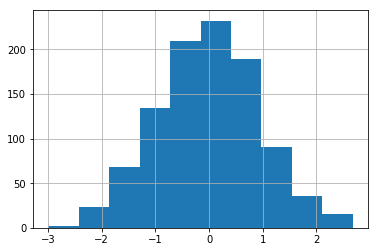

In [50]:
pd.DataFrame(X_org)[0].hist()
# pd.DataFrame(X_org)[1].hist()
# pd.DataFrame(X_org)[2].hist()

In [51]:
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


In [52]:
print("특성 출현 횟수:\n{}".format(np.bincount(X[:, 0].astype('int'))))

특성 출현 횟수:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9 17
  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5  2  1
  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1  0  2  0
  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0  0  0  0  0
  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0
  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5,0,'Value')

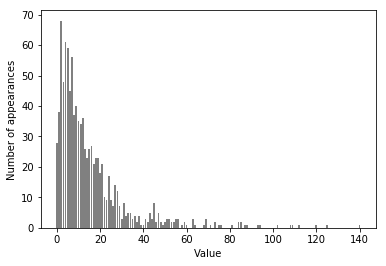

In [53]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

* 위의 그래프 처럼, *작은 수치가 많고 큰 수치는 몇 되지 않는 데이터* 가 실제로 자주 나타남
* 선형모델(Linear Model)은 이러한 데이터를 잘 처리하지 못함
* 위의 데이터에 **Ridge Regression**을 적용해봄

In [54]:
from sklearn.linear_model import Ridge

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


* 이러한 데이터에 대해 선형 모델의 성능을 높이기 위해서 **로그 스케일(log scale)**로 변환
* 데이터에 0이 있는 경우 $\log{0}$은 `-inf`이기 때문에 $\log{(X+1)}$을 사용

In [56]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5,0,'Value')

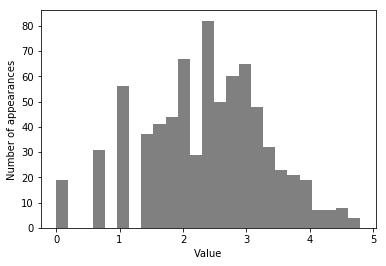

In [57]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [58]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


### 정리
* 데이터셋과 모델의 조합에 최적인 변환 방법을 찾기란 엄청 어려운 일
* 일부 특성만 변환하거나, 특성마다 모두 다르게 변환해야 하는 경우도 있음
* 가끔은 **회귀(Regression)**에서 **타겟(Target) 변수** $y$를 변환하는 것이 좋을 때도 있음 $\rightarrow$ 예를들어, 카운트(주문횟수)를 예측하는 경우 $\log{(y+1)}$로 변환하면 성능 향상에 도움이 됨
* 앞의 예에서 보았듯이 **구간분할(Binning), 다항식(Polynomial), 상호작용(interaction)** 은 모델의 성능에 큰 영향을 줄 수 있음
* 특히 선형모델(Linear Model) 이나 나이브 베이즈 모델(Naive Bayes Model)같이 덜 복잡한 모델일 경우 영향을 크게 받음
* 반면, 트리 기반 모델(Tree based model)은 모델 자체에서 중요한 상호작용을 찾아낼 수 있고 대부분의 경우 데이터를 명시적으로 변환하지 않아도 됨
* SVM, KNN, NN 과 같은 모델 또한 **구간분할(Binning), 다항식(Polynomial), 상호작용(interaction)** 로 성능 향상을 시킬 수 있지만 선형모델(Linear Model) 보다는 영향이 뚜렷하지 않음

## 4.5 특성 자동 선택 - Automatic Feature Selection

* 새로운 특성(Feature)을 만드는 방법은 많으므로 데이터의 차원이 원래의 데이터(original data)의 특성 수 이상으로 증가하기 쉬움
* 하지만, 특성이 추가되면 모델은 더 복잡해지고 오버피팅(overfitting)될 가능성이 높아짐
* 따라서, 특성을 추가할 때나 고차원 데이터셋을 사용할 때, 가장 의미있는 특성만 선택하고 나머지는 제외하여 특성 수를 줄이는 것이 좋음
* 이를 위한 방법으로는 **변량 통계(univariate statistics)**, **모델 기반 선택(model-based selection)**, **반복적 선택(iterative selection)**이 있음
* 이 방법들은 Supervised Learning 이므로 최적값을 구하기 위해 Target 값이 필요함
* 또한 Training / Test set을 나눈 다음 Training set만 특성 선택에 사용해야 함

### 4.5.1 일변량 통계 - Univariate statistics
* 일변량 통계는 각각의 특성(feature)과 타겟(target)사이에 중요한 통계적 관계가 있는지를 계산함
* **분산분석(ANOVA, Analysis Of Variance)** 이라고도 함
* **분산분석**은 **일변량** 즉, 각 특성이 독립적으로 평가되므로, 다른 특성과 연관성이 큰 특성은 선택되지 않음
* 계산이 빠르며, 모델에 상관없이 특성을 선택(Feature selection)하고 싶은 경우 사용할 수 있음

### [slkearn.feature_selection](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection)
* Scikit-learn에서는 **ANOVA**분석을 sklearn.feature_selection.[f_classif](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif)로 제공함
* `f_classif`를 sklearn.feature_selection.[SelectKBest](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)나 sklearn.feature_selection.[SelectPercentile](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile)과 함께 사용함
* **[SelectKBest](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)** : Select features according to the k highest scores.
* **[SelectPercentile](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile)** : Select features according to a percentile of the highest scores.

In [59]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

In [81]:
# 위스콘신 유방암 데이터 셋 로드
cancer = load_breast_cancer()

# 고정된 난수를 발생시킴
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# Original data에 노이즈 특성 추가
# 처음 30개는 original data 특성이고 다음 50개는 노이즈임
print("Original # of Features: {}".format(cancer.data.shape))
X_w_noise = np.column_stack([cancer.data, noise])
print("Original+Noise # of Features: {}".format(X_w_noise.shape))

Original # of Features: (569, 30)
Original+Noise # of Features: (569, 80)


In [82]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X_w_noise, cancer.target, random_state=0, test_size=.5)

# f_classif(ANOVA)와 SelectPercentile을 사용하여 특성의 50%를 선택
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

SelectPercentile(percentile=50,
         score_func=<function f_classif at 0x00000216D104DC80>)

In [83]:
# Training set에 적용
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([], <a list of 0 Text yticklabel objects>)

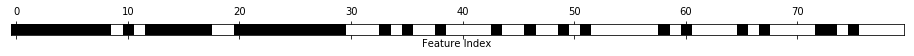

In [84]:
mask = select.get_support()
print(mask)
# True는 검은색, False는 흰색으로 마스킹함
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Feature Index")
plt.yticks(())

* 전체 특성(`X_w_noise.shape`)을 사용했을 때와 ANOVA를 이용하여 선택된 특성(`X_test_selected`)을 사용했을 때 **LogisticRegression** 성능을 비교함

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
# 테스트 데이터 변환
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("전체 특성(80개)을 사용한 점수: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수: {:.3f}".format(lr.score(X_test_selected, y_test)))

전체 특성(80개)을 사용한 점수: 0.930
선택된 일부 특성을 사용한 점수: 0.940


### 4.5.2 모델 기반 특성 선택 - Model-based Feature Selection
* Supervised learning 모델을 이용하여 특성(feature)의 중요도를 평가해 가장 중요한 특성들만 선택
* **Decision Tree** 기반 모델 같은 경우 `feature_importances_` 속성을 통해 중요한 특성들을 선택할 수 있음

### sklearn.feature_selection.[SelectFromModel](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html)
* Scikit-learn에서는 [SelectFromModel](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html)를 통해 모델 기반의 특성 선택을 할 수 있도록 구현되어 있음

In [87]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [88]:
# RandomForest를 이용한 Feature selection
# Tree 100개를 이용해 Feature Importance를 계산
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),
                         threshold="median")
select.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold='median')

In [89]:
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True  True  True False
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False False  True False
 False False False False  True False False  True False  True  True False
 False False  True False False  True  True False False False False False
 False  True False False False False False False False  True False False
 False  True False False False False False False]


([], <a list of 0 Text yticklabel objects>)

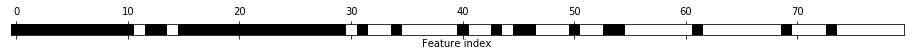

In [92]:
mask = select.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
print(mask)
plt.xlabel("Feature index")
plt.yticks(())

In [91]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


### 4.5.3 반복적 특성 선택 - Iterative feature selection
* 반복적 특성 선택은 두 가지 방법이 있음
* 첫번째, 특성을 선택하지 않은 상태에서 하나씩 추가 해가는 방법
* 두번째, 특성을 전체 선택한 다음 하나씩 제거
* **재귀적 특성 제거(RFE, Recursive Feature Elimination)**: 모든 특성으로 시작해 모델을 만들고 특성 중요도가 낮은 특성을 제거하는 방법

### sklearn.feature_selection.[RFE](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)
* Feature ranking with recursive feature elimination.

In [93]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
  n_features_to_select=40, step=1, verbose=0)

([<matplotlib.axis.YTick at 0x216d2d67d68>],
 <a list of 1 Text yticklabel objects>)

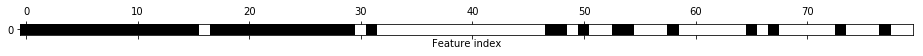

In [95]:
# 선택된 특성을 표시합니다
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Feature index")
plt.yticks([0])

In [96]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.951


In [97]:
# RFE 에서 사용된 모델 -> 여기서는 RandomForestClassifier 모델을 이용해서도 예측을 할 수 있음
print("테스트 점수: {:.3f}".format(select.score(X_test, y_test)))

테스트 점수: 0.951
